In [3]:
import pandas as pd
import re
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [21]:
df_netflix_2019 = pd.read_csv('netflix_titles.csv')

In [22]:
df_netflix_2019.isnull().sum().sort_values(ascending=False)  #malejaco

director        1969
cast             570
country          476
date_added        11
rating            10
title              0
show_id            0
type               0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
df_netflix_2019.shape #6234 rows, 12 colums

(6234, 12)

In [13]:
for column in df_netflix_2019.columns:
    percentage = df_netflix_2019[column].isnull().mean()
    print(f'{column}: {round(percentage*100,2)}%)

SyntaxError: unterminated string literal (detected at line 3) (3029685687.py, line 3)

In [14]:
!pip freeze

anyio==4.9.0
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
arrow==1.3.0
asttokens==3.0.0
async-lru==2.0.5
attrs==25.3.0
babel==2.17.0
beautifulsoup4==4.13.4
bleach==6.2.0
certifi==2025.7.14
cffi==1.17.1
charset-normalizer==3.4.2
comm==0.2.3
contourpy==1.3.3
cycler==0.12.1
debugpy==1.8.15
decorator==5.2.1
defusedxml==0.7.1
executing==2.2.0
fastjsonschema==2.21.1
fonttools==4.59.0
fqdn==1.5.1
h11==0.16.0
httpcore==1.0.9
httpx==0.28.1
idna==3.10
ipykernel==6.30.0
ipython==9.4.0
ipython_pygments_lexers==1.1.1
isoduration==20.11.0
jedi==0.19.2
Jinja2==3.1.6
joblib==1.5.1
json5==0.12.0
jsonpointer==3.0.0
jsonschema==4.25.0
jsonschema-specifications==2025.4.1
jupyter-events==0.12.0
jupyter-lsp==2.2.6
jupyter_client==8.6.3
jupyter_core==5.8.1
jupyter_server==2.16.0
jupyter_server_terminals==0.5.3
jupyterlab==4.4.5
jupyterlab_pygments==0.3.0
jupyterlab_server==2.27.3
kiwisolver==1.4.8
lark==1.2.2
MarkupSafe==3.0.2
matplotlib==3.10.3
matplotlib-inline==0.1.7
mistune==3.1.3
nbclient==0.10.2
nb

In [15]:
!pip install --user regex

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.9/798.9 kB 8.1 MB/s  0:00:00


In [19]:
for column in df_netflix_2019.columns: # .columns attribute represents the column labels of the DataFrame
    percentage = df_netflix_2019[column].isnull().mean()
    print(f'{column}: {round(percentage*100,2)}%')
    

show_id: 0.0%
type: 0.0%
title: 0.0%
director: 31.58%
cast: 9.14%
country: 7.64%
date_added: 0.18%
release_year: 0.0%
rating: 0.16%
duration: 0.0%
listed_in: 0.0%
description: 0.0%


In [20]:
df_netflix_2019.show()

AttributeError: 'DataFrame' object has no attribute 'show'

In [23]:
df

NameError: name 'df' is not defined

In [24]:
df_netflix_2019

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [25]:
#drop column
df_netflix_2019.drop('director', axis=1)
no_director = df_netflix_2019[df_netflix_2019['director'].isnull()].index
df_netflix_2019.drop(no_director, axis=0)

df_netflix_2019.drop(no_director, axis=0)
#~ + .isnull()
df_netflix_2019[~df_netflix_2019['director'].isnull()]
#dropna()
df_netflix_2019.dropna(subset=['director'])

#2. use median, mean (numeric data) or mode (categorical data)
df_netflix_2019[df_netflix_2019['rating'].isnull()]
mode = ''.join(df_netflix_2019['rating'].mode())
df_netflix_2019['rating'].fillna(mode, inplace=True)
#3. replace with arbitrary number or text
df_netflix_2019['duration'].fillna(0, inplace=True)



/tmp/ipykernel_5525/70210519.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_netflix_2019['rating'].fillna(mode, inplace=True)
/tmp/ipykernel_5525/70210519.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [26]:
#drop column
df_netflix_2019.drop('director', axis=1)
no_director = df_netflix_2019[df_netflix_2019['director'].isnull()].index
df_netflix_2019.drop(no_director, axis=0)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
...,...,...,...,...,...,...,...,...,...,...,...,...
6142,80063224,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"August 30, 2019",2019,TV-PG,7 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
6158,80164216,TV Show,Miraculous: Tales of Ladybug & Cat Noir,Thomas Astruc,"Cristina Vee, Bryce Papenbrook, Keith Silverst...","France, South Korea, Japan","August 2, 2019",2018,TV-Y7,4 Seasons,"Kids' TV, TV Action & Adventure","When Paris is in peril, Marinette becomes Lady..."
6167,80115328,TV Show,Sacred Games,"Vikramaditya Motwane, Anurag Kashyap","Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...","India, United States","August 15, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",A link in their pasts leads an honest cop to a...
6182,80176842,TV Show,Men on a Mission,Jung-ah Im,"Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...",South Korea,"April 9, 2019",2019,TV-14,4 Seasons,"International TV Shows, Korean TV Shows, Stand...",Male celebs play make-believe as high schooler...


In [27]:
df_netflix_2019

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,TV-MA,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [28]:
df_netflix_2019.drop('director', axis=1)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,2016,TV-MA,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [29]:
no_director = df_netflix_2019[df_netflix_2019['director'].isnull()].index
df_netflix_2019.drop(no_director, axis=0)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
...,...,...,...,...,...,...,...,...,...,...,...,...
6142,80063224,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"August 30, 2019",2019,TV-PG,7 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
6158,80164216,TV Show,Miraculous: Tales of Ladybug & Cat Noir,Thomas Astruc,"Cristina Vee, Bryce Papenbrook, Keith Silverst...","France, South Korea, Japan","August 2, 2019",2018,TV-Y7,4 Seasons,"Kids' TV, TV Action & Adventure","When Paris is in peril, Marinette becomes Lady..."
6167,80115328,TV Show,Sacred Games,"Vikramaditya Motwane, Anurag Kashyap","Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...","India, United States","August 15, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",A link in their pasts leads an honest cop to a...
6182,80176842,TV Show,Men on a Mission,Jung-ah Im,"Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...",South Korea,"April 9, 2019",2019,TV-14,4 Seasons,"International TV Shows, Korean TV Shows, Stand...",Male celebs play make-believe as high schooler...


In [30]:
df_netflix_2019[~df_netflix_2019['director'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
...,...,...,...,...,...,...,...,...,...,...,...,...
6142,80063224,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"August 30, 2019",2019,TV-PG,7 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
6158,80164216,TV Show,Miraculous: Tales of Ladybug & Cat Noir,Thomas Astruc,"Cristina Vee, Bryce Papenbrook, Keith Silverst...","France, South Korea, Japan","August 2, 2019",2018,TV-Y7,4 Seasons,"Kids' TV, TV Action & Adventure","When Paris is in peril, Marinette becomes Lady..."
6167,80115328,TV Show,Sacred Games,"Vikramaditya Motwane, Anurag Kashyap","Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...","India, United States","August 15, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",A link in their pasts leads an honest cop to a...
6182,80176842,TV Show,Men on a Mission,Jung-ah Im,"Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...",South Korea,"April 9, 2019",2019,TV-14,4 Seasons,"International TV Shows, Korean TV Shows, Stand...",Male celebs play make-believe as high schooler...


In [31]:
df_netflix_2019.dropna(subset=['director'])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
...,...,...,...,...,...,...,...,...,...,...,...,...
6142,80063224,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"August 30, 2019",2019,TV-PG,7 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
6158,80164216,TV Show,Miraculous: Tales of Ladybug & Cat Noir,Thomas Astruc,"Cristina Vee, Bryce Papenbrook, Keith Silverst...","France, South Korea, Japan","August 2, 2019",2018,TV-Y7,4 Seasons,"Kids' TV, TV Action & Adventure","When Paris is in peril, Marinette becomes Lady..."
6167,80115328,TV Show,Sacred Games,"Vikramaditya Motwane, Anurag Kashyap","Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...","India, United States","August 15, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",A link in their pasts leads an honest cop to a...
6182,80176842,TV Show,Men on a Mission,Jung-ah Im,"Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...",South Korea,"April 9, 2019",2019,TV-14,4 Seasons,"International TV Shows, Korean TV Shows, Stand...",Male celebs play make-believe as high schooler...


In [ ]:

df_netflix_2019[df_netflix_2019['rating'].isnull()]
mode = ''.join(df_netflix_2019['rating'].mode())
df_netflix_2019['rating'].fillna(mode, inplace=True)
#3. replace with arbitrary number or text
df_netflix_2019['duration'].fillna(0, inplace=True)



In [33]:
df_movie = df_netflix_2019[df_netflix_2019['type']=='Movie']
df_movie = df_movie.assign(minute = df_movie['duration'].str.extract(r'(\d+)', expand=False).astype(int))

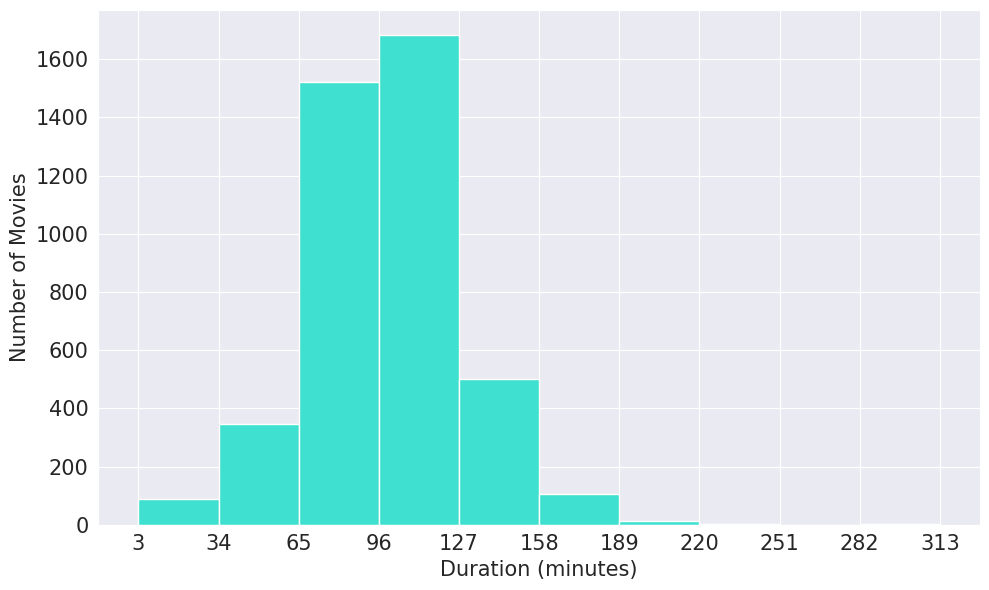

In [34]:
min_minute, max_minute = df_movie['minute'].min(), df_movie['minute'].max()
minbin, maxbin = math.floor(min_minute), math.ceil(max_minute)
gap = maxbin - minbin
#choose number of beens
bins = 10
width = math.ceil(gap/bins)

bins = np.arange(minbin,maxbin+width, width)
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist(df_movie['minute'], bins=bins, color='turquoise')

fig.set_size_inches(10, 6)
ax.set_xlabel('Duration (minutes)', fontsize=15)
ax.set_ylabel('Number of Movies', fontsize=15)
plt.xticks(bins, fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
plt.show()

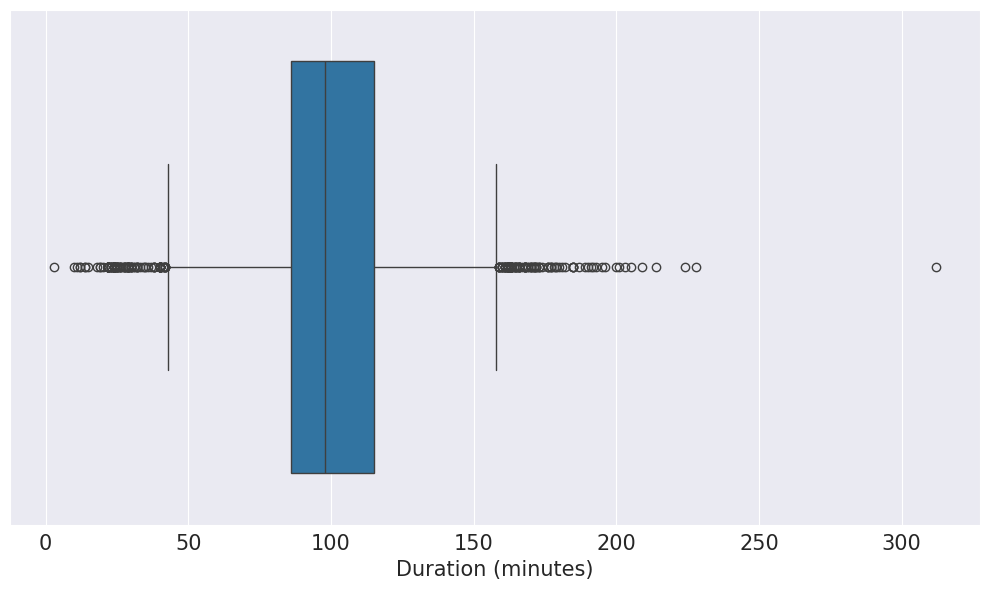

In [35]:
#boxplot
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
ax = sns.boxplot(x=df_movie['minute'])
ax.set_xlabel('Duration (minutes)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
fig.savefig('boxplot_cleaning.png')

In [36]:
df_movie['minute'].describe()

count    4265.000000
mean       99.100821
std        28.074857
min         3.000000
25%        86.000000
50%        98.000000
75%       115.000000
max       312.000000
Name: minute, dtype: float64

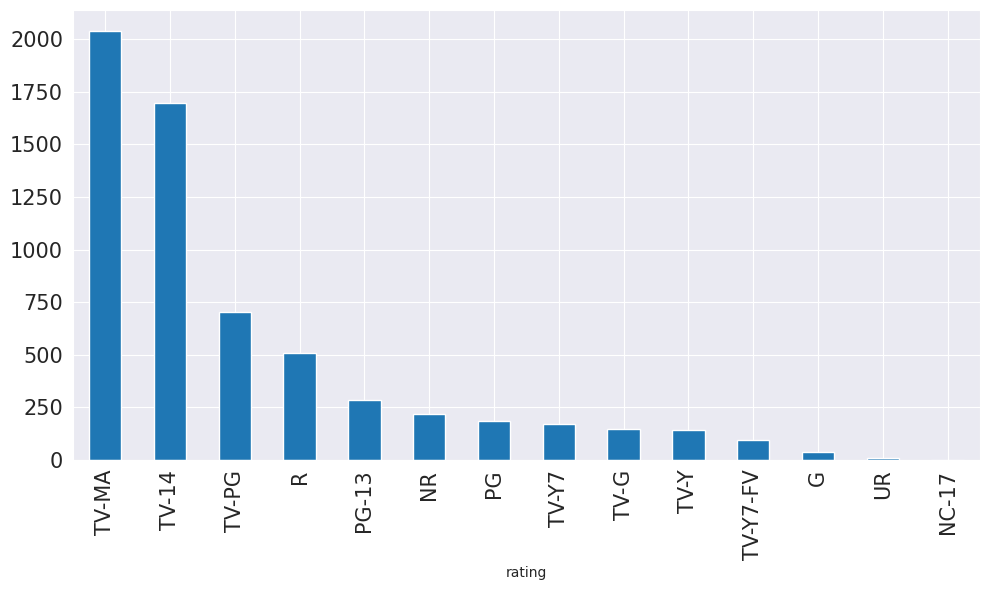

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
fig = df_netflix_2019['rating'].value_counts().plot.bar().get_figure()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
fig.savefig('bar_cleaning')

In [38]:
df_movie[(df_movie['minute']<43) | (df_movie['minute']>158)]
#filtering outliers out
df_movie = df_movie[(df_movie['minute']>43) & (df_movie['minute']<158)]

In [39]:


#inconsistent capitalization
df_netflix_2019['title'] = df_netflix_2019['title'].apply(lambda x:x.lower())
# Remove strings in columns (sub, replace) remove punctuation
df_netflix_2019['title'] = df_netflix_2019['title'].apply(lambda x:re.sub('[^\w\s]','',x))
#unnecessary data
df_netflix_2019 = df_netflix_2019.drop_duplicates()
#droping tiltes from the same type (movie or tv) to avoid further problems (34 out)
df_netflix_2019.drop_duplicates(['title','type'], keep='last', inplace=True)



In [41]:


df_netflix_originals = pd.read_csv('netflix_originals.csv')
#inconsintent column names
df_netflix_originals.rename(columns={'titles':'title', 'years':'release_year'}, inplace=True)
# inconsistent dtypes (data must be same type before merging)
df_netflix_originals = df_netflix_originals.astype({"release_year": int})



In [42]:


df_netflix_originals = pd.read_csv('netflix_originals.csv')
#inconsintent column names
df_netflix_originals.rename(columns={'titles':'title', 'years':'release_year'}, inplace=True)
# inconsistent dtypes (data must be same type before merging)
df_netflix_originals = df_netflix_originals.astype({"release_year": int})



In [43]:


df_netflix_originals = pd.read_csv('netflix_originals.csv')
#inconsintent column names
df_netflix_originals.rename(columns={'titles':'title', 'years':'release_year'}, inplace=True)
# inconsistent dtypes (data must be same type before merging)
df_netflix_originals = df_netflix_originals.astype({"release_year": int})



In [44]:


df_netflix_originals = pd.read_csv('netflix_originals.csv')
#inconsintent column names
df_netflix_originals.rename(columns={'titles':'title', 'years':'release_year'}, inplace=True)
# inconsistent dtypes (data must be same type before merging)
df_netflix_originals = df_netflix_originals.astype({"release_year": int})



In [ ]:


df_netflix[['original', 'type']].value_counts()



In [ ]:
df_netflix_originals['title'] = df_netflix_originals['title'].apply(lambda x:x.lower())
df_netflix_originals['title'] = df_netflix_originals['title'].str.lower()
#clean leading and trailing spaces
df_netflix_originals['title'] = df_netflix_originals['title'].apply(lambda x:x.strip())
df_netflix_originals['title'] = df_netflix_originals['title'].str.strip()
# remove punctuation: clean characters other than word or spaces
df_netflix_originals['title'] = df_netflix_originals['title'].apply(lambda x:re.sub('[^\w\s]','',x))
df_netflix_originals['title'].replace('[^\w\s]', '', regex=True, inplace=True)